<a href="https://colab.research.google.com/github/HagarIbrahiem/FxdSln-Challenges/blob/main/FxdSln_Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Sr Data Scientist - Assessment - Fixed Solutions**

**Name: Hagar Bendary**

**Task #3**

Please allow me to provide some information regarding the challenges:
- For both challenges, I have uploaded the dataset to Google Drive and accessed it via Colab.

# **Dataset-Overview ..** ☕ 🧙

Sports Wear Group is one of the leading retailers industry in the region, with more than 50 branches across the region. It runs multiple lines of business applications, mainly in the sport goods industry. They are in the middle of their digital transformation journey and they want to keep leading the market by satisfying their customers and meeting their expectation.


# **Import Lib**  ⚒️ ⚙️

In [1]:

# imports
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import pylab
from IPython.display import display
import plotly.express as px
import plotly.graph_objects as go

from datetime import datetime
from datetime import timedelta
from dateutil.relativedelta import relativedelta

import warnings
# ignore warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:,.1f}'.format
%matplotlib inline
plotsize = (13, 5)

In [2]:

# set the display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
##Global Variables

# define a list of countries
countries = ['Germany', 'France', 'Austria']

# **Load Data** ⌛⌛

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
proj_path = '/content/gdrive/MyDrive/'
# Load the data into a DataFrame
raw_data = pd.read_csv(proj_path + 'full_gen_data.csv')
df = raw_data

# **Getting Closer Look** 🔍 👀

In [6]:
df.shape

(100000, 24)

In [7]:
df.columns

Index(['country', 'article', 'sales', 'regular_price', 'current_price',
       'ratio', 'retailweek', 'promo1', 'promo2', 'customer_id', 'article.1',
       'productgroup', 'category', 'cost', 'style', 'sizes', 'gender',
       'rgb_r_main_col', 'rgb_g_main_col', 'rgb_b_main_col', 'rgb_r_sec_col',
       'rgb_g_sec_col', 'rgb_b_sec_col', 'label'],
      dtype='object')

In [8]:
df.head()

,country,article,sales,regular_price,current_price,ratio,retailweek,promo1,promo2,customer_id,article.1,productgroup,category,cost,style,sizes,gender,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,label
0,Germany,YN8639,28,6.0,4.0,0.7,2016-03-27,0,0,"1,003.0",OC6355,SHOES,TRAINING,13.3,slim,"xxs,xs,s,m,l,xl,xxl",women,205,104,57,255,187,255,0
1,Germany,YN8639,28,6.0,4.0,0.7,2016-03-27,0,0,"1,003.0",AP5568,SHORTS,TRAINING,2.3,regular,"xxs,xs,s,m,l,xl,xxl",women,188,238,104,255,187,255,0
2,Germany,YN8639,28,6.0,4.0,0.7,2016-03-27,0,0,"1,003.0",CB8861,HARDWARE ACCESSORIES,GOLF,1.7,regular,"xxs,xs,s,m,l,xl,xxl",women,205,173,0,255,187,255,0
3,Germany,YN8639,28,6.0,4.0,0.7,2016-03-27,0,0,"1,003.0",LI3529,SHOES,RUNNING,9.0,regular,"xxs,xs,s,m,l,xl,xxl",kids,205,140,149,164,211,238,0
4,Germany,YN8639,28,6.0,4.0,0.7,2016-03-27,0,0,"1,003.0",GG8661,SHOES,RELAX CASUAL,9.6,regular,"xxs,xs,s,m,l,xl,xxl",women,138,43,226,164,211,238,0


In [9]:
df.sample(1).iloc[0]

country                    Austria
article                     XH3727
sales                           52
regular_price                 94.0
current_price                 28.9
ratio                          0.3
retailweek              2016-04-17
promo1                           0
promo2                           0
customer_id                4,725.0
article.1                   PC6383
productgroup                 SHOES
category          FOOTBALL GENERIC
cost                           9.9
style                         wide
sizes                  xs,s,m,l,xl
gender                      unisex
rgb_r_main_col                 139
rgb_g_main_col                  26
rgb_b_main_col                  26
rgb_r_sec_col                  205
rgb_g_sec_col                  155
rgb_b_sec_col                  155
label                            0
Name: 51586, dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   country         100000 non-null  object 
 1   article         100000 non-null  object 
 2   sales           100000 non-null  int64  
 3   regular_price   100000 non-null  float64
 4   current_price   100000 non-null  float64
 5   ratio           100000 non-null  float64
 6   retailweek      100000 non-null  object 
 7   promo1          100000 non-null  int64  
 8   promo2          100000 non-null  int64  
 9   customer_id     100000 non-null  float64
 10  article.1       100000 non-null  object 
 11  productgroup    100000 non-null  object 
 12  category        100000 non-null  object 
 13  cost            100000 non-null  float64
 14  style           100000 non-null  object 
 15  sizes           100000 non-null  object 
 16  gender          100000 non-null  object 
 17  rgb_r_main_

`retailweek` is in string format , so it needs to be casting to date format

In [11]:
#Check if customer_id is redundant
df.customer_id.value_counts()[10:]

10.0       10
5,108.0    10
5,321.0    10
4,233.0    10
3,075.0    10
4,226.0    10
2,635.0    10
711.0      10
5,828.0    10
3,881.0    10
3,336.0    10
1,389.0    10
2,423.0    10
309.0      10
5,305.0    10
5,343.0    10
5,120.0    10
284.0      10
5,888.0    10
1,835.0    10
5,406.0    10
2,608.0    10
1,926.0    10
2,191.0    10
4,804.0    10
4,832.0    10
1,078.0    10
2,355.0    10
3,806.0    10
3,184.0    10
3,608.0    10
2,472.0    10
2,111.0    10
2,332.0    10
5,259.0    10
3,924.0    10
268.0      10
2,100.0    10
3,349.0    10
2,409.0    10
4,082.0    10
4,180.0    10
4,528.0    10
3,005.0    10
2,203.0    10
2,724.0    10
4,325.0    10
5,138.0    10
847.0      10
3,868.0    10
4,902.0    10
2,552.0    10
409.0      10
1,903.0    10
1,808.0    10
5,601.0    10
131.0      10
5,175.0    10
2,532.0    10
2,025.0    10
3,628.0    10
682.0      10
4,703.0    10
5,425.0    10
3,966.0    10
878.0      10
5,139.0    10
210.0      10
5,267.0    10
2,766.0    10
1,740.0    10
1,838.

In [12]:
# Let's remove the customer_id column
df = df.drop(columns='customer_id')

**Cheking Target Variable**

In [13]:
df.label.value_counts()

0    86072
1    13928
Name: label, dtype: int64

<Axes: >

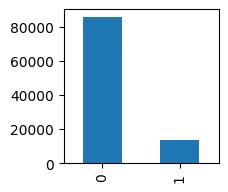

In [14]:
df["label"].value_counts().plot(kind="bar" , figsize= (2,2))

It's noted that the target `label` is imblanced

**Checking Independent Features**

In [15]:
def print_unique_values(encoded_df, columns):
    """
    Print the unique values for each categorical column in the DataFrame.

    Args:
        encoded_df (DataFrame): Encoded DataFrame containing categorical columns.
        columns (list): Array of column names to loop through.

    Returns:
        None
    """
    for col in columns:
        unique_values = encoded_df[col].unique()
        print(f"Unique values of '{col}': {unique_values}\n")

In [16]:
# create a list of column names with dtype 'object'
object_cols = list(df.select_dtypes(include=['object']).columns)
numerical_cols = list(df.select_dtypes(exclude=['object']).columns)

In [17]:
print_unique_values(df, object_cols)

Unique values of 'country': ['Germany' 'Austria' 'France']

Unique values of 'article': ['YN8639' 'CF3238' 'WR9459' 'EF2771' 'LX1494' 'VF6733' 'YK5786' 'CX1431'
 'TK4862' 'ZM8792' 'LU3394' 'IW7978' 'XG3252' 'UM7314' 'XG6449' 'ZJ5718'
 'LI3529' 'KO9295' 'GJ5184' 'UJ4517' 'BU9681' 'CR8478' 'VK4838' 'AA7884'
 'BY9685' 'UX6851' 'FF7283' 'CB8861' 'FE4648' 'BC1489' 'PQ6953' 'WO1329'
 'LH8921' 'TS8795' 'LI6472' 'CA2199' 'WK5365' 'QS5396' 'TM4166' 'BF7459'
 'JY1298' 'MP6772' 'AZ5221' 'MR4948' 'UD3728' 'VT7698' 'DI9187' 'OZ8992'
 'UB1117' 'TN5256' 'BE9148' 'FU5676' 'ST3419' 'ZK4922' 'FJ2121' 'KT8964'
 'RO5412' 'BS7795' 'QP2819' 'GW8244' 'AP5568' 'PP8845' 'GC8114' 'MJ2618'
 'ZC7213' 'GD2286' 'RN5619' 'EN9438' 'PZ7731' 'LR5226' 'BM9116' 'LD8468'
 'ML2223' 'NQ1161' 'GT5685' 'QU7755' 'GA4832' 'HM5731' 'EH5694' 'ZV2187'
 'KF6572' 'IR3275' 'MO9371' 'AA8941' 'PN1714' 'LX5583' 'IA4131' 'PV1343'
 'WP4135' 'CY6963' 'VY6942' 'FB5424' 'PQ6773' 'PW6278' 'VA9789' 'IF7337'
 'XB1815' 'VL9749' 'CC8861' 'DM6271'

It's noted that:
-  The data is only covering three countries [Germany, Austria , France]
-  While this is considered a Time-Series data , the data is already shuffled as `retailweek` is not in chronological order, thus sorting data may help to gain much more insights

**Handle Date Feature - retailweek**

In [18]:
# from string to datetime
df.retailweek = pd.to_datetime(df.retailweek)

In [19]:
# sort the dataset by the date column
df = df.sort_values('retailweek')

In [20]:
df.retailweek.describe( )

count                  100000
unique                    123
top       2015-11-22 00:00:00
freq                     1100
first     2014-12-28 00:00:00
last      2017-04-30 00:00:00
Name: retailweek, dtype: object

**P.S.** The dataset is covering retail weeks between the period of `2014-12-28` to `2017-04-30` , let's see how many weeks within this period using `Timedelta` lib.

In [21]:
from datetime import datetime, timedelta

# Define the start and end dates
start_date = datetime.strptime(str(df.retailweek.describe()['first'].date()), '%Y-%m-%d')
end_date = datetime.strptime(str(df.retailweek.describe()['last'].date()), '%Y-%m-%d')

# Calculate the number of weeks
num_weeks = (end_date - start_date).days // 7

# Print the result
print(f"Number of weeks between {start_date.date()} and {end_date.date()}: {num_weeks}")

Number of weeks between 2014-12-28 and 2017-04-30: 122


So , the dataset covers around `122` weeks of the retail weeks , adding the firts week `2014-12-28` make the number `123` , Let's make sure of the number of the unique values at the `retailweek`

In [22]:
df.retailweek.nunique()

123

In [23]:
## adding new features regarding retailweek
df['year'] = df.retailweek.dt.year
df['month'] = df.retailweek.dt.month
df['day'] = df.retailweek.dt.day

df['DayOfWeek_No'] = df.retailweek.dt.dayofweek

# Convert the MonthOfYear column to a formatted string
df['MonthOfYear'] = df['retailweek'].dt.strftime('%b %Y')

In [24]:
# # Let's remove the retailweek column
# df = df.drop(columns='retailweek')

In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sales,"100,000.0",56.8,87.9,1.0,10.0,26.0,64.0,898.0
regular_price,"100,000.0",52.4,35.3,4.0,25.9,41.0,80.0,197.9
current_price,"100,000.0",28.3,22.6,1.9,11.9,20.9,38.0,195.9
ratio,"100,000.0",0.5,0.2,0.3,0.4,0.5,0.7,1.0
promo1,"100,000.0",0.1,0.2,0.0,0.0,0.0,0.0,1.0
promo2,"100,000.0",0.0,0.1,0.0,0.0,0.0,0.0,1.0
cost,"100,000.0",6.5,3.9,1.3,2.3,6.9,9.6,13.3
rgb_r_main_col,"100,000.0",161.4,39.8,79.0,138.0,160.0,205.0,205.0
rgb_g_main_col,"100,000.0",139.6,63.6,26.0,104.0,144.0,181.0,238.0
rgb_b_main_col,"100,000.0",133.5,81.1,0.0,57.0,143.0,205.0,250.0


In [26]:
df.describe(include='object').T

,count,unique,top,freq
country,100000,3,Germany,49400
article,100000,477,BR3179,610
article.1,100000,10,AC7347,10000
productgroup,100000,4,SHOES,60000
category,100000,6,TRAINING,30000
style,100000,3,regular,50000
sizes,100000,2,"xxs,xs,s,m,l,xl,xxl",90000
gender,100000,4,women,70000
MonthOfYear,100000,29,May 2016,4530


# **Data Preprocessing** 📈 📊

### Check Missing Values

In [27]:
## checking nullable values
df.isna().sum()

country           0
article           0
sales             0
regular_price     0
current_price     0
ratio             0
retailweek        0
promo1            0
promo2            0
article.1         0
productgroup      0
category          0
cost              0
style             0
sizes             0
gender            0
rgb_r_main_col    0
rgb_g_main_col    0
rgb_b_main_col    0
rgb_r_sec_col     0
rgb_g_sec_col     0
rgb_b_sec_col     0
label             0
year              0
month             0
day               0
DayOfWeek_No      0
MonthOfYear       0
dtype: int64

<Axes: >

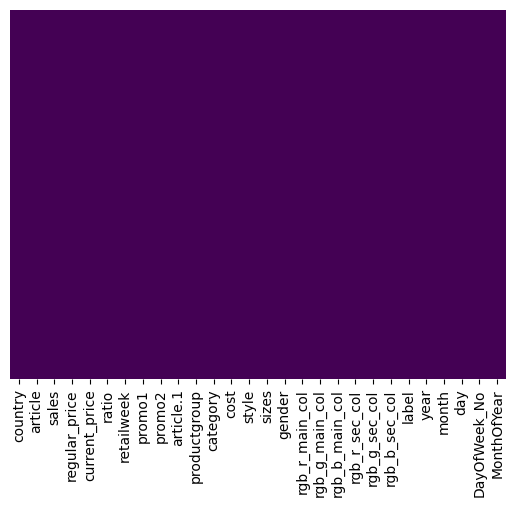

In [28]:
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

Great! No missing values.

### Check Outliers

Outliers for only `Numerical features` will be detected ,peering in mind that no need to check outliers for:
- `rgb_main_col` and `rgb_sec_col` as they are reprsenting RGB colors
- `promo1` and `promo1` as they only have [0,1]

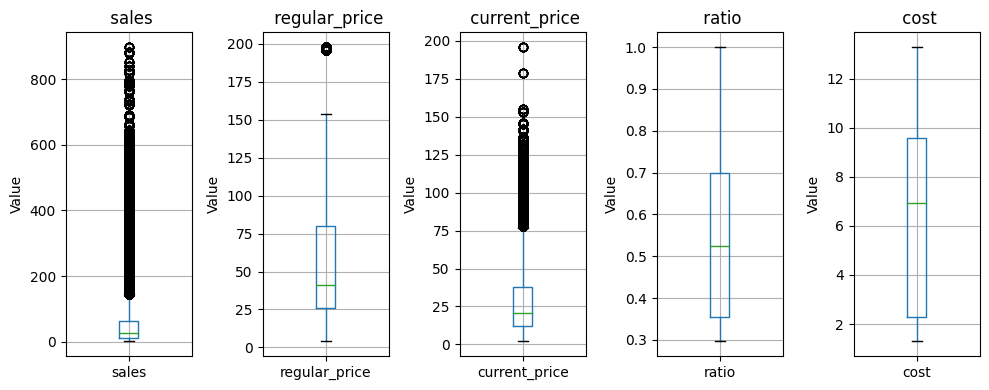

In [29]:
numerical_columns = ['sales', 'regular_price', 'current_price', 'ratio', 'cost']

# Create subplots with the specified number of rows and columns
fig, axes = plt.subplots(1, 5, figsize=(10, 4))

# Flatten the axes array to allow for easy iteration
axes = axes.flatten()

# Iterate over the numerical columns and create a boxplot for each feature
for i, col in enumerate(numerical_columns):
    ax = axes[i]
    df.boxplot(column=col, ax=ax)
    ax.set_title(f' {col}')
    ax.set_ylabel('Value')

# If there are unused subplots, remove them
if len(numerical_columns) < len(axes):
    for j in range(len(numerical_columns), len(axes)):
        fig.delaxes(axes[j])

# Adjust the layout and spacing between subplots
fig.tight_layout()

# Display the plot
plt.show()

It's noted that both `sales` and `current_price` exteremly have oultiers , while `regular_price` slightly has outliers.

# **Exploratory Data Analysis – Getting Insights**   🧐💡

**Check Feature Correlation**

<Axes: >

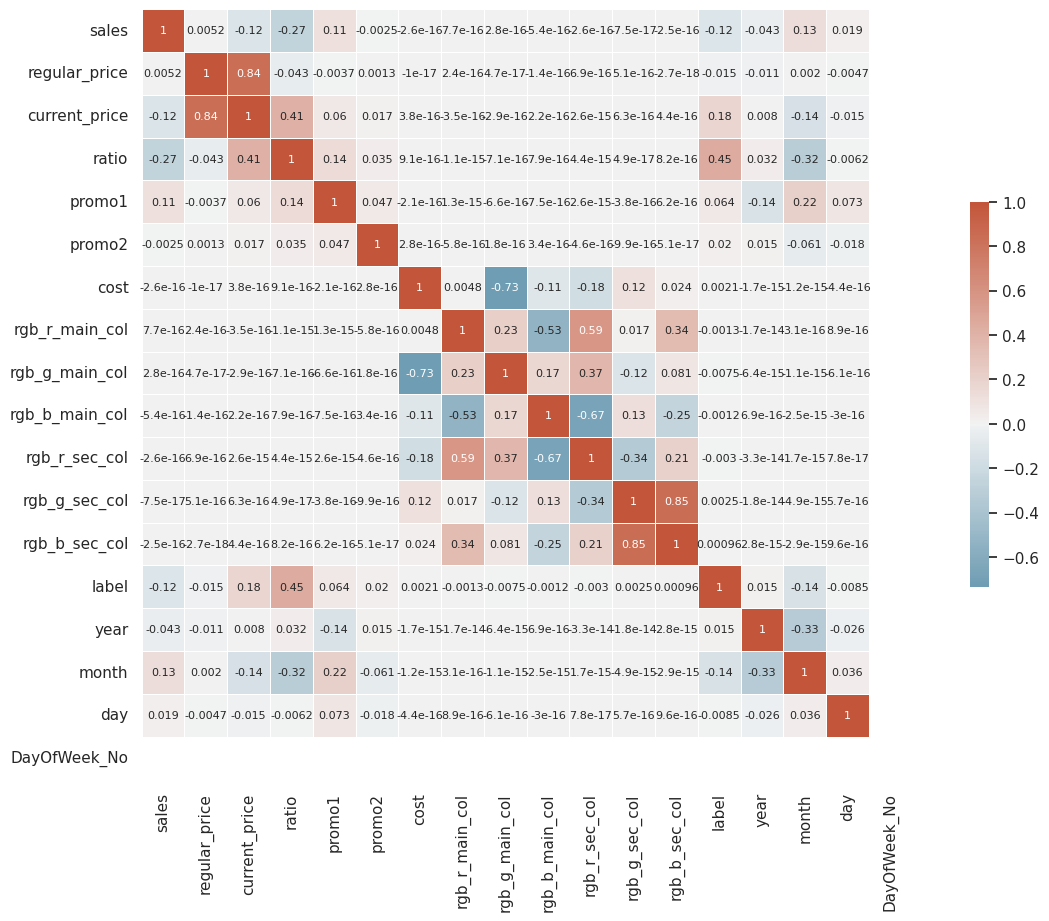

In [30]:
sns.set_theme(style="white")

# Compute the correlation matrix
corr = df.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))

# Generate a custom diverging colormap (choose colors here)
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, annot_kws={"fontsize":8})


* Here we can infer that `regular_price` has strong positive correlation with `current_price`.

* Here we can infer that `rgb_g_sec_col` has strong positive correlation with `rgb_b_sec_col`.



**Checking Correlation of Independent Variables with the Dependent Variable**

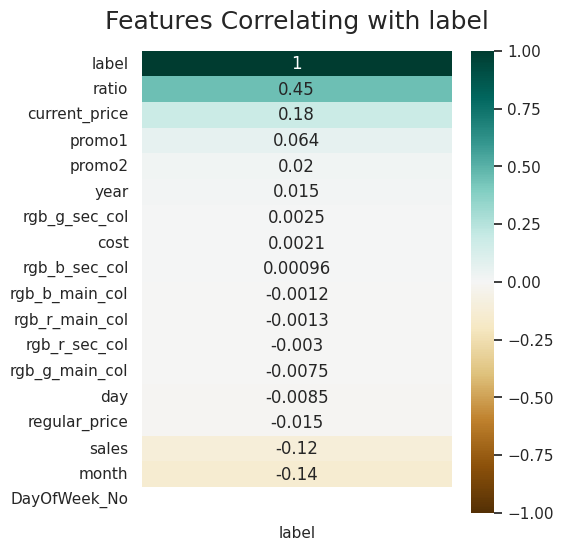

In [31]:
plt.figure(figsize=(5, 6))
heatmap = sns.heatmap(df.corr()[['label']].sort_values(by='label', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with label', fontdict={'fontsize':18}, pad=16);

* the correlation between `sales` and `label` is -0.12, which indicates that they’re weakly negatively correlated.

* `rgb_r_main_col` , `rgb_g_main_col`, `rgb_b_main_col`,`rgb_r_sec_col`,`rgb_g_sec_col`, and `rgb_b_sec_col` has almost no correlation (linear relationship) with `label`, which indicates that they’re basically not correlated.

* There is very little association between `cost` and `label`

### Sales & Promotions Analytics

In [32]:

# Count the frequency of each country
country_counts = df['country'].value_counts()

# Extract the country names and their corresponding frequencies
labels = country_counts.index.tolist()
values = country_counts.values.tolist()

# Create the Pie Chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values)])

# Customize the layout
fig.update_layout(title='Country Frequency',  height=400, width=700)

# Display the chart
fig.show()



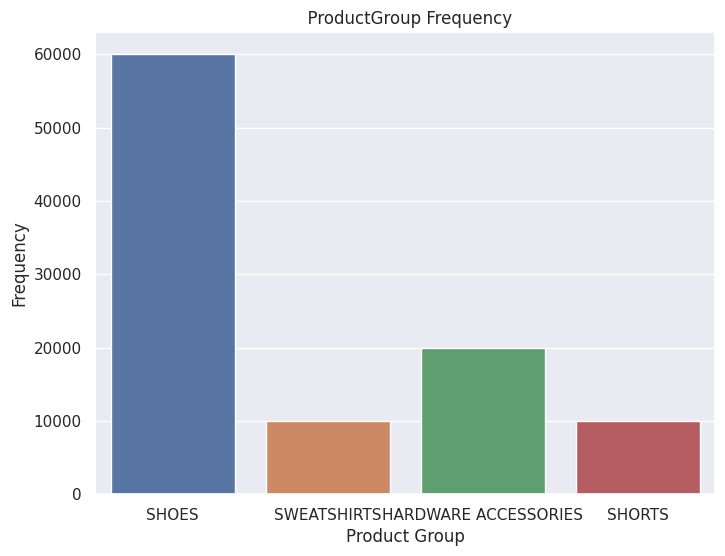

In [33]:
# Plot the frequency of each value in 'productgroup' using Seaborn
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='productgroup')

# Set labels and title
plt.xlabel('Product Group')
plt.ylabel('Frequency')
plt.title('  ProductGroup Frequency')

# Display the plot
plt.show()

Let's check productgroup's frequency for `Sold` item..

In [34]:
# Filter the DataFrame where label is equal to 1
filtered_df = df[df['label'] == 1]

# Calculate the frequency of each value in the 'productgroup' column
freq = filtered_df['productgroup'].value_counts().reset_index()

# Rename the columns
freq.columns = ['productgroup', 'frequency']

# Display the frequency of each value
print(freq)

           productgroup  frequency
0                 SHOES       8374
1  HARDWARE ACCESSORIES       2814
2           SWEATSHIRTS       1389
3                SHORTS       1351


It seems that most sold items were `SHOES`, then `HARDWARE ACCESSORIES ` , pering in mind that data is `imbalanced` in regards of `productgroup `

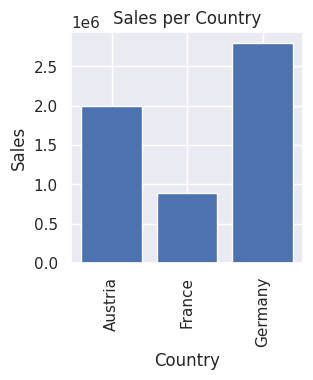

In [35]:
# Group the DataFrame by 'country' column and calculate the total sales
grouped_df = df.groupby('country')['sales'].sum()

# Extract the countries and sales values
countries = grouped_df.index
sales = grouped_df.values

# Create a bar plot for sales by country
plt.figure(figsize=(3, 3))
plt.bar(countries, sales)
plt.xlabel('Country')
plt.ylabel('Sales')
plt.title('Sales per Country')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

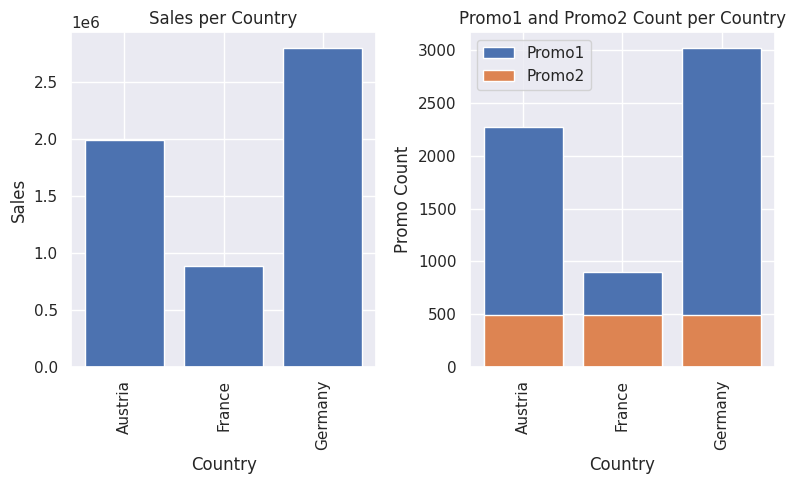

In [36]:
# Group the DataFrame by 'country' column and calculate the total sales
grouped_df_sales = df.groupby('country')['sales'].sum()

# Extract the countries and sales values
countries_sales = grouped_df_sales.index
sales = grouped_df_sales.values

# Create a bar plot for sales by country
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.bar(countries_sales, sales)
plt.xlabel('Country')
plt.ylabel('Sales')
plt.title('Sales per Country')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Group the DataFrame by 'country' column and calculate the count of promo1 = 1
grouped_df_promo1 = df[df['promo1'] == 1].groupby('country').size()

# Group the DataFrame by 'country' column and calculate the count of promo2 = 1
grouped_df_promo2 = df[df['promo2'] == 1].groupby('country').size()

# Extract the countries and promo1 count values
countries_promo = grouped_df_promo1.index
promo1_count = grouped_df_promo1.values

# Extract the promo2 count values
promo2_count = grouped_df_promo2.values

# Create a bar plot for promo1 and promo2 count by country
plt.subplot(1, 3, 2)
plt.bar(countries_promo, promo1_count, label='Promo1')
plt.bar(countries_promo, promo2_count, label='Promo2')
plt.xlabel('Country')
plt.ylabel('Promo Count')
plt.title('Promo1 and Promo2 Count per Country')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend()

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()



**Inference**

- **According to the 1st graph: It is worth noting that the country with the highest sales revenue is Germany, followed by Austria and France, in descending order.**

- **Based on the first and second graphs, it can be observed that there is a strong and positive correlation between sales and promotions. The data suggests that countries with a higher number of promotions tend to have higher sales. In other words, as the number of promotions launched in a country increases, the sales also tend to increase.**

In [37]:
# Group the dataset by country and count the occurrences where promo1 = 1 and promo2 = 1
promo1_counts = df[df['promo1'] == 1].groupby('country').size()
promo2_counts = df[df['promo2'] == 1].groupby('country').size()

# Print the promo1 and promo2 counts for each country
for country in df['country'].unique():
    print(f"Country: {country}")
    print(f"Promo1 Count: {promo1_counts.get(country, 0)}")
    print(f"Promo2 Count: {promo2_counts.get(country, 0)}")
    print()

Country: Austria
Promo1 Count: 2270
Promo2 Count: 0

Country: Germany
Promo1 Count: 3020
Promo2 Count: 0

Country: France
Promo1 Count: 900
Promo2 Count: 490



**While Promo1 had been lauched in all three countries, Promo2 only had been launched in `France`**

Let's measure `Success_rate` of `prmom1` per country , in addition to Success_rate of `prmom2` in `France`

In [38]:
# ***********Success_rate of promo1 ******************

# Get the list of unique countries in the dataset
countries = df['country'].unique()

# Iterate over each country
for country in countries:
    # Filter the dataset for the current country and the desired conditions
    filtered_df = df[(df['country'] == country) & (df['promo1'] == 1) & (df['label'] == 1) & (df['promo2'] == 0)]

    # Calculate the success rate for promo1 in the current country
    success_rate = (len(filtered_df) / len(df[(df['country'] == country) & (df['promo1'] == 1) & (df['promo2'] == 0)])) * 100

    # Print the success rate for the current country
    print(f"Promo1 Success Rate for {country}: {success_rate}%")


# ***********Success_rate of promo2 in France******************

# Calculate the success rate for promo1 in the current country
filtered_df2 = df[(df['country'] == 'France') & (df['promo1'] == 0) & (df['label'] == 1) & (df['promo2'] == 1)]
success_rate2 = (len(filtered_df) / len(df[(df['country'] == 'France') & (df['promo1'] == 0) & (df['promo2'] == 1)] )) * 100
# Print the success rate for the current country
print(f"\nPromo2 Success Rate for France: {success_rate2}%")



Promo1 Success Rate for Austria: 22.86343612334802%
Promo1 Success Rate for Germany: 22.251655629139073%
Promo1 Success Rate for France: 20.759493670886076%

Promo2 Success Rate for France: 43.15789473684211%



According to our data:
- Regarding `Sales`, `promo1` is doing well in 'Germany & Austria' , while `promo2` is doing much beeter in `France`
- **900** `media advertisements -promo1` were launced in France, while
- only **490** `store events- promo2 `, had been conducted.

Yet,
- It's noted that `store events` has **the double Success Rate** of `media advertisements` in `France` ,while it's only the half number.


Ley's illustrate this using graphs..

In [39]:
import plotly.express as px

# Filter the dataset to include only rows with label = 1 and the countries
filtered_df = df[(df['label'] == 1) & (df['country'].isin(countries))]

# Group the filtered DataFrame by 'country' and calculate the sum of promo1 and promo2
grouped_df = filtered_df.groupby('country').agg({'promo1': 'sum', 'promo2': 'sum'}).reset_index()

# Create the Plotly bar chart
fig = px.bar(grouped_df, x='country', y=['promo1', 'promo2'], barmode='group')

# Set the axis labels and chart title
fig.update_layout(xaxis_title='Country', yaxis_title='Promotion Amount', title='Promotions Frequency per Country')

# Show the chart
fig.show()

The figure depicts the distribution of `media advertisements & store events` (promo1 and promo2) across countries within a time period between `2014-12-28 and 2017-04-30`. The data highlights the following:

- In Germany, a total of **672 media advertisements** were launched.
- In Austria, a total of **519 media advertisements** were launched.
- In France, there were **206 media advertisements** and **117 store events** launched.

In [40]:
# Count the number of rows for each combination of promo1 and promo2 values, grouped by country
counts = df.groupby(['country', 'promo1', 'promo2']).size().reset_index(name='count')

# Iterate over the counts DataFrame and print the results for each country
for country in counts['country'].unique():
    country_counts = counts[counts['country'] == country]
    print("Country:", country)
    for index, row in country_counts.iterrows():
        promo1 = row['promo1']
        promo2 = row['promo2']
        count = row['count']
        print(f"Promo1 = {promo1}, Promo2 = {promo2}: {count} rows")
    print()

Country: Austria
Promo1 = 0, Promo2 = 0: 32870 rows
Promo1 = 1, Promo2 = 0: 2270 rows

Country: France
Promo1 = 0, Promo2 = 0: 14180 rows
Promo1 = 0, Promo2 = 1: 380 rows
Promo1 = 1, Promo2 = 0: 790 rows
Promo1 = 1, Promo2 = 1: 110 rows

Country: Germany
Promo1 = 0, Promo2 = 0: 46380 rows
Promo1 = 1, Promo2 = 0: 3020 rows



- In `Austria`, a total of **2270** clients were exclusively reached through media advertisement, while **32870** clients neither received information through media advertisement nor participated in any store events.

- Moreover, in Germany, **3020** clients were solely informed through media advertisement, and **46380** clients did not receive information through media advertisement nor attend any store events.

- Moving on to France, there were **790** clients who solely received information through media advertisement, and out of those, only **390** clients attended store events. Additionally, **110** clients in France were both informed through media advertisement and attended store events. However, there were **14180** clients who did not receive information through media advertisement and did not attend any store events.

In [41]:
# Group the data by MonthOfYear and calculate the total sales and combined promo1+promo2
monthly_sales = df.groupby('MonthOfYear').agg({'sales': 'sum', 'promo1': 'sum', 'promo2': 'sum'})

# Find the month with the highest sales
highest_sales_month = monthly_sales['sales'].idxmax()

# Find the month with the highest combined promo1 and promo2
monthly_sales['Promo1+Promo2'] = monthly_sales['promo1'] + monthly_sales['promo2']
highest_promo_month = monthly_sales['Promo1+Promo2'].idxmax()

# Print the results
print("Month with the highest sales:", highest_sales_month)
print("Month with the highest combined promo1+promo2:", highest_promo_month)

Month with the highest sales: May 2016
Month with the highest combined promo1+promo2: Jul 2015


Let's visulaize these findings for more insights

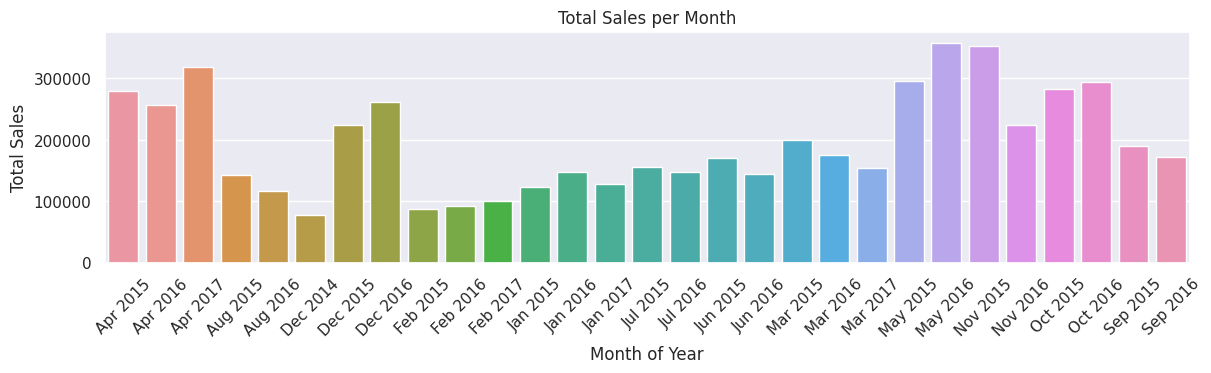

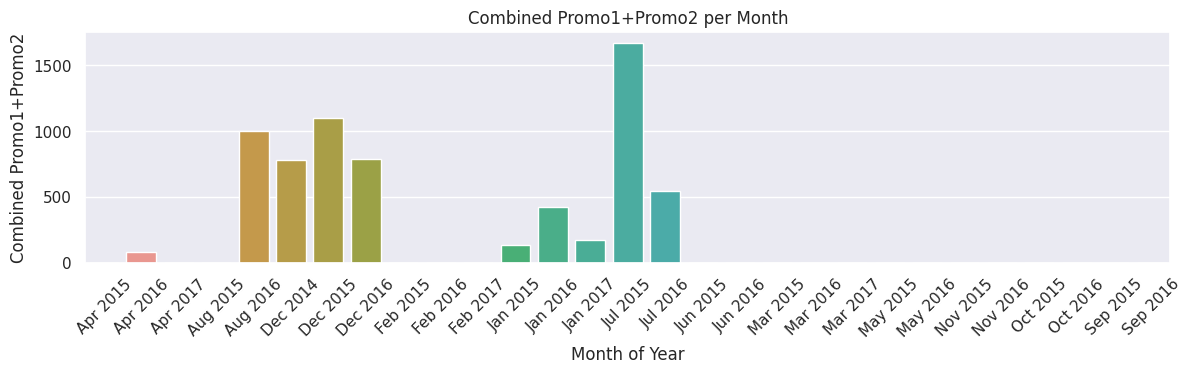

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the total sales and combined promo1+promo2 for each month
plt.figure(figsize=(14, 3))
sns.barplot(x=monthly_sales.index, y='sales', data=monthly_sales)
plt.title('Total Sales per Month')
plt.xlabel('Month of Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)  # Rotate x-labels by 45 degrees
plt.show()


plt.figure(figsize=(14, 3))
sns.barplot(x=monthly_sales.index, y='Promo1+Promo2', data=monthly_sales)
plt.title('Combined Promo1+Promo2 per Month')
plt.xlabel('Month of Year')
plt.ylabel('Combined Promo1+Promo2')
plt.xticks(rotation=45)  # Rotate x-labels by 45 degrees
plt.show()


The company strategically promoted its products during specific periods namely - `August 2015 and 2016`,
- as well as `December 2014, 2015, and 2016`.

These months coincide with the peak of holiday seasons, including [ Christmas, Black Friday, and Cyber Monday] . Consequently, the company observed a slight increase in sales during these promotional periods.

On the other hand, launching campaigns in:
- `January 2015, 2016, and 2017`,
- `April 2015 and February 2017`, and
-  `July 2015 and 2016` (which experienced the highest peak of promotions)

did not yield the same level of sales increase compared to the holiday seasons. Therefore, it is evident that the impact on sales varies between holiday seasons and summer months.

Based on these findings, it is recommended that **the company focuses its campaigns and promotions during the holiday seasons rather than the summer months**.

It is important to take into consideration that the influence of media advertisements and store events may differ from one country to another, with store events having a greater impact in France compared to media advertisements.




### Products & Consumption Behaviors Analytics

In [43]:
# Let's check the top three most sold product for each country

# Group the DataFrame by 'country' column and find the most sold article in each group
most_sold_articles = df.groupby('country')['article'].apply(lambda x: x.value_counts().idxmax())

# Retrieve the rows corresponding to the most sold articles per country
most_sold_rows = df[df.groupby('country')['article'].apply(lambda x: x == x.value_counts().idxmax())]

# Display the most sold article per country along with its related features
for country, article in most_sold_articles.items():
    print(f"Country: {country}")
    print(f"Most Sold Article: {article}")
    print("Related Features:")
    related_features = most_sold_rows[most_sold_rows['country'] == country].drop_duplicates(subset='article')[['article', 'productgroup', 'category', 'gender']]
    print(related_features)
    print()

Country: Austria
Most Sold Article: XC9518
Related Features:
      article productgroup  category gender
58670  XC9518        SHOES  TRAINING  women

Country: France
Most Sold Article: TC9631
Related Features:
      article productgroup  category gender
79420  TC9631        SHOES  TRAINING  women

Country: Germany
Most Sold Article: BX8284
Related Features:
     article productgroup category gender
9317  BX8284        SHOES   INDOOR  women



- Regarding The Best Seller product was:
    - `XC9518` in `Austria`
    - `TC9631` in `France`  
    - `BX8284` in `Germany`

- While the most interested customer segment in the all three countries is `women`, who are interested particaulry in buying `SHOES` , while most common product_category in Austria and France is `Training` , yet in Germany is `Indoor`

Let's get the top 5 best sellers articles per each country ..

In [44]:
# Group the DataFrame by 'country' column and find the most frequent articles in each group
top_articles = df.groupby('country')['article'].value_counts().groupby('country').head(5)

# Iterate over unique countries and display the top frequent articles per country
unique_countries = top_articles.index.get_level_values('country').unique()
for country in unique_countries:
    print(f"********** Country: {country} **********")
    print("Top 5 Most Frequent Articles:")
    articles = top_articles.loc[country]
    for article, count in articles.items():
        print(f"Article: {article}")
        print(f"Count: {count}")
        print("Specifications:")
        specs = df[(df['country'] == country) & (df['article'] == article)][['article', 'regular_price' , 'current_price', 'ratio', 'cost','promo1' , 'promo2' ]].head(1)
        print(specs)
        print()

********** Country: Austria **********
Top 5 Most Frequent Articles:
Article: XC9518
Count: 280
Specifications:
      article  regular_price  current_price  ratio  cost  promo1  promo2
58670  XC9518           26.9           16.9    0.6  13.3       1       0

Article: MR4948
Count: 240
Specifications:
      article  regular_price  current_price  ratio  cost  promo1  promo2
30990  MR4948           31.9           22.9    0.7  13.3       0       0

Article: PW6278
Count: 230
Specifications:
      article  regular_price  current_price  ratio  cost  promo1  promo2
91574  PW6278           63.0           37.0    0.6   9.6       0       0

Article: BC1489
Count: 220
Specifications:
      article  regular_price  current_price  ratio  cost  promo1  promo2
33361  BC1489           45.0           16.9    0.4   2.3       1       0

Article: CA2479
Count: 220
Specifications:
      article  regular_price  current_price  ratio  cost  promo1  promo2
86692  CA2479            7.0            6.0    0.9   1.

According to the cell below , let's count `Avergae Prices for the 5 Top best sellers per country`

In [45]:
APTBS_austria = (16.9+22.9+37+16.9+6) / 5
APTBS_france =(20.9+25.9+21.9+21.9+23.9) / 5
APTBS_germany = (19.9+52+27.9+24.9+82) /5

print ('APTBS_austria',round(APTBS_austria,2))
print ('APTBS_france',APTBS_france)
print ('APTBS_germany',APTBS_germany)


APTBS_austria 19.94
APTBS_france 22.9
APTBS_germany 41.34


Based on the analysis of average prices for the top five best-selling items in each country, it can be inferred that customers in Germany are willing to pay/afford prices that are approximately twice as expensive as those in France and Austria.
This observation suggests that:
-  There is potential for increased sales in both Austria and France by offering items at lower and clearance price, as well as encourage clearances discounts points,
- While investing more in promotional activities in Germany to target a broader range of customer segments.

In [46]:
column_names = ['regular_price', 'current_price', 'ratio', 'cost']
means = df[column_names].describe().loc['mean']

print("Mean values:")
print(means)

Mean values:
regular_price   52.4
current_price   28.3
ratio            0.5
cost             6.5
Name: mean, dtype: float64


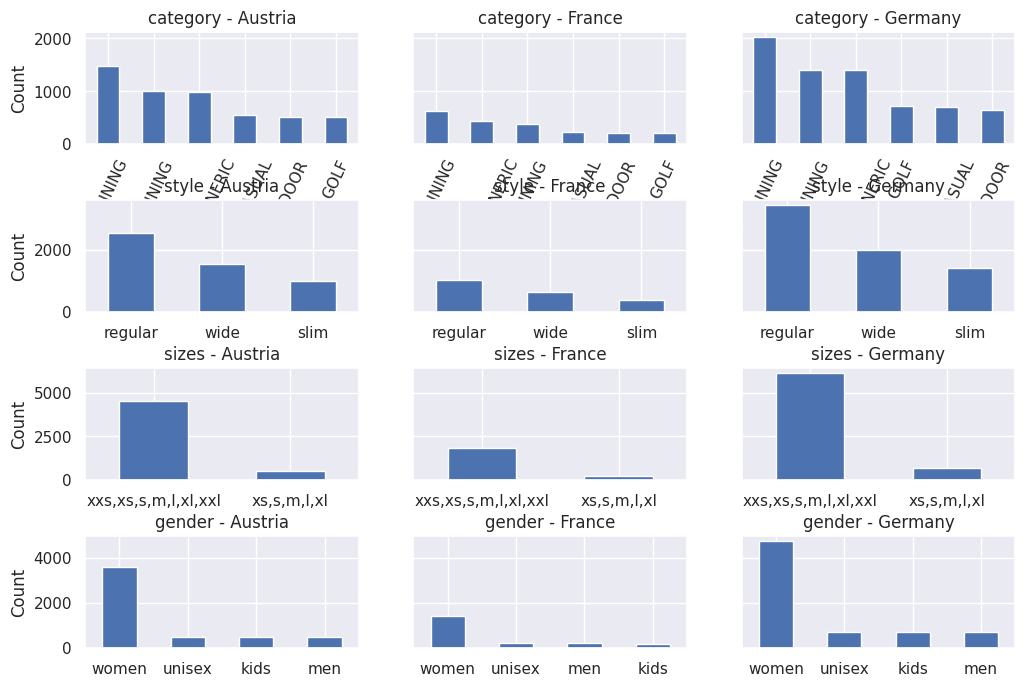

In [47]:

# Group the DataFrame by 'country' column
grouped_df = df.groupby('country')

# Features for subplots
features = ['category', 'style', 'sizes', 'gender']

# Create subplots for each feature and country
fig, axes = plt.subplots(len(features), len(grouped_df), figsize=(12, 8), sharey='row', tight_layout=True, gridspec_kw={'hspace': .5})

# Iterate over the features and create a bar plot for each country
for i, feature in enumerate(features):
    for j, (country, data) in enumerate(grouped_df):
        ax = axes[i, j]
        filtered_data = data[data['label'] == 1]  # Filtered data for label == 1
        counts = filtered_data[feature].value_counts()
        counts.plot.bar(ax=ax)
        ax.set_title(f'{feature} - {country}')
        ax.set_xlabel('')
        ax.set_ylabel('Count')

        if i != 0:
            ax.set_xticklabels(counts.index, rotation=0)  # Set x-axis tick labels horizontally
        else:
            ax.set_xticklabels(counts.index, rotation=65)  # Set x-axis tick labels vertically for the first row

# Display the plot
plt.show()

- The customers in all three countries have the same consumbtion behavior that:
   - `Training` , `regular`,`xxs,xs,s,m,l,xl,xxl`, while the target segment in all three countries should be `Women`.
- Peering in mind that `France` is the less consumption behavior comparing to Germany and Austria , thus more promos need to be launched in France.

### Time Series Analytics

In [48]:
############ Plot: Count of Promo1 and Promo2 Occurrences by RetailWeek per Country #############

# Filter the data where promo1 is 1 or promo2 is 1
filtered_data = df[(df['promo1'] == 1) | (df['promo2'] == 1)]

# Calculate the count of promo1 or promo2 occurrences for each unique RetailWeek value and Country
week_counts = filtered_data.groupby(['MonthOfYear', 'country'])['promo1', 'promo2'].sum().reset_index()

# Create a bar plot using plotly
fig = go.Figure()

# Add trace for promo1 count
fig.add_trace(go.Bar(
    x=week_counts['MonthOfYear'],
    y=week_counts['promo1'],
    name='Promo1',
    hovertemplate='Count: %{y}<br>Country: %{text}',
    text=week_counts['country']
))

# Add trace for promo2 count
fig.add_trace(go.Bar(
    x=week_counts['MonthOfYear'],
    y=week_counts['promo2'],
    name='Promo2',
    hovertemplate='Count: %{y}<br>Country: %{text}',
    text=week_counts['country']
))

# Set the title and labels
fig.update_layout(
    title='Count of Promo1 and Promo2 Occurrences by RetailWeek per Country',
    xaxis=dict(title='RetailWeek'),
    yaxis=dict(title='Count')
)

# Show the plot
fig.show()

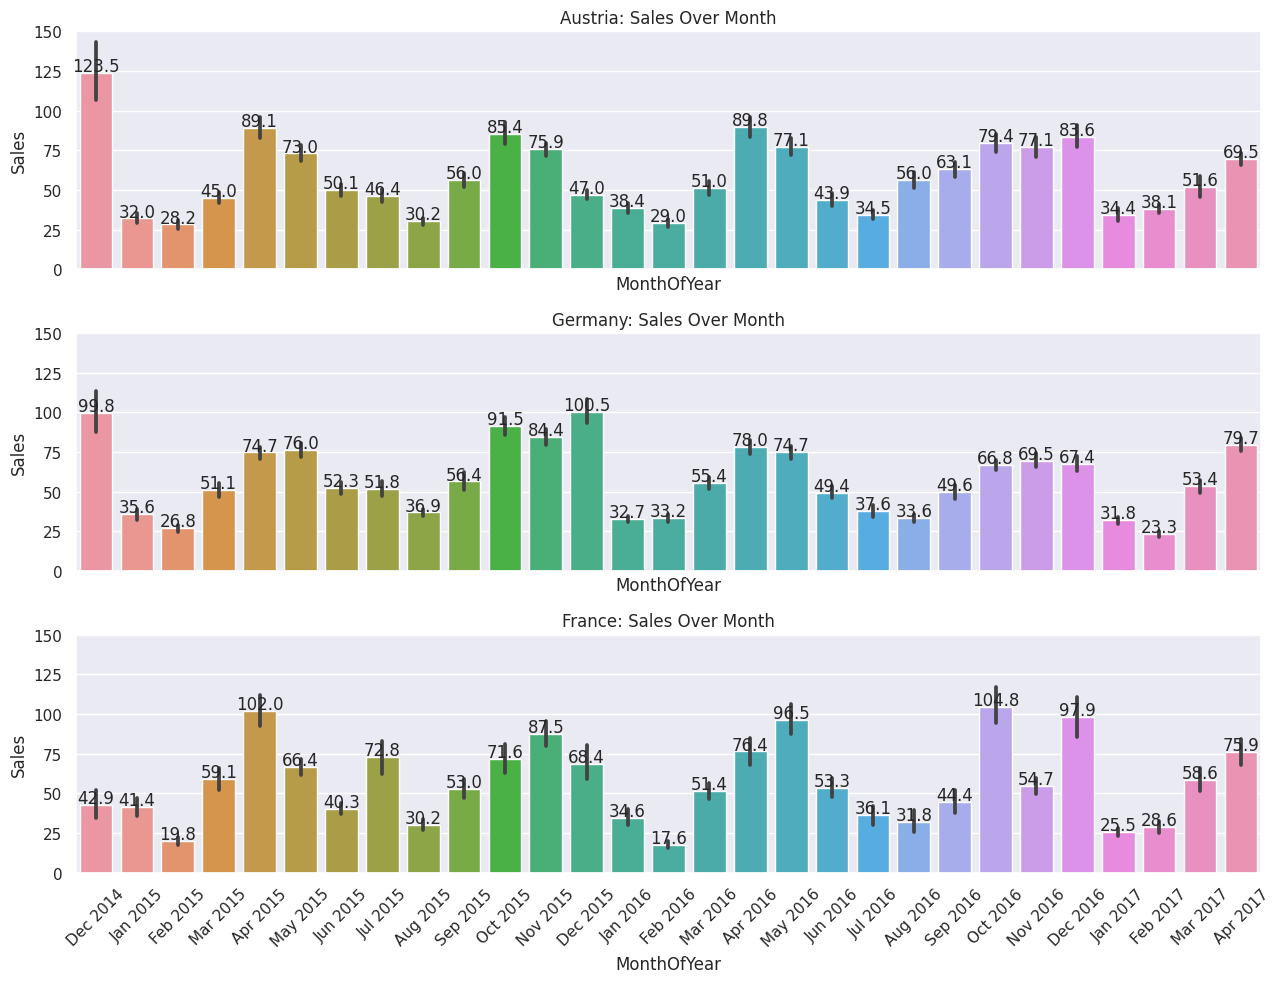

In [49]:
############ Plot:  Sales Over Months per Country #############

# Create a figure with subplots for each country
fig, axes = plt.subplots(len(countries), 1, figsize=(13, 10), sharex=True)

# Iterate over the countries and plot the bar plots
for i, country in enumerate(countries):
    # Filter the data for the current country
    country_data = df[df['country'] == country]

    # Plot the bar plot with labels over MonthOfYear
    sns.barplot(data=country_data, x='MonthOfYear', y='sales', ax=axes[i])
    axes[i].set_title(f'{country}: Sales Over Month')

    # Add labels over the bars
    for p in axes[i].patches:
        axes[i].annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center', xytext=(0, 5), textcoords='offset points')

        # Set y-axis limit
        axes[i].set_ylim([0, 150])

        # Add y-axis label
        axes[i].set_ylabel('Sales')

        # Rotate x-axis labels
        axes[i].tick_params(axis='x', rotation=45)

# Set x-axis label on the last subplot
axes[-1].set_xlabel('MonthOfYear')


# Adjust the layout and spacing of the subplots
plt.tight_layout()

# Show the plot
plt.show()

It's Noted that :

- The `sales` variable exhibits:
   - A `sharp decrease` in **January and February,** , which does make since as there are two main sales periods in Europe:
      - Winter sales, which usually start on the second Wednesday of January and last four weeks.
      -  Summer sales, which begin on the last Wednesday of June and last four weeks.

   - A `high increase`  in the months of ** October, November and Decemeber** each year. the peak in Novermber and December can be explaines in regards of the holiday season
         - Christmas Season: which lasts for just a few days after Christmas (usually on 27th and 28th of December every year).
         - Black Friday which is usually on the fourth Friday of November every year.
         - Cyber Monday which is on the Monday immediately after Black Friday.

Thus
It's highly recommended to launch `media advertisement & store events` during month with high-shopping peaks as **October, November and Decemeber** then **April ,and May**

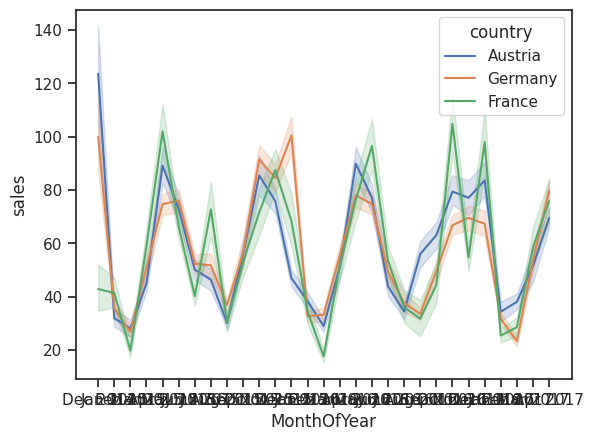

In [50]:
# Create a line plot using seaborn
sns.set(style="ticks")
fig = sns.lineplot(data=df, x='MonthOfYear', y='sales', hue='country')

# Get the line plot data from the seaborn figure
lines = fig.get_lines()

# Create a trace for each line
traces = []
for line, country in zip(lines, countries):
    x = line.get_xdata()
    y = line.get_ydata()
    trace = go.Scatter(x=x, y=y, name=country)
    traces.append(trace)

# Define the layout
layout = go.Layout(
    title='Sales Over Months - Similar Consumption Behavior',
    xaxis=dict(title='MonthOfYear'),
    yaxis=dict(title='Sales', range=[0, 150])
)

# Create the figure with data and layout
fig = go.Figure(data=traces, layout=layout)

# Add hover labels for sales numbers
fig.update_traces(hovertemplate='Sales: %{y}')

# Show the plot
fig.show()

**The graph indicates that the three countries almost have the same pattern of consumption behavior**

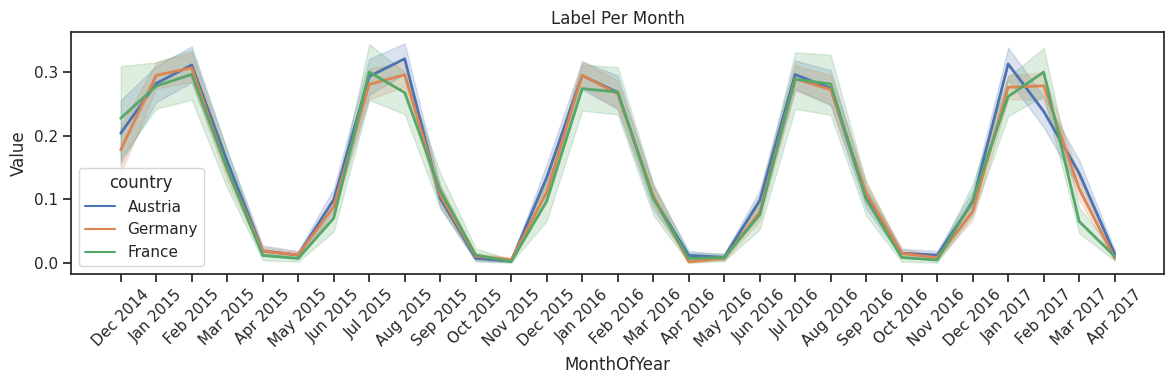

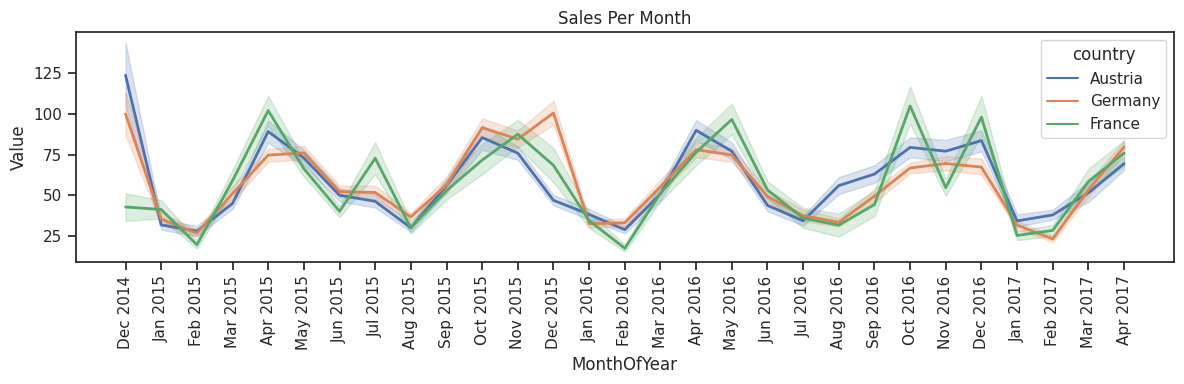

In [51]:
############## plot: Sales vs Labels Per Month ######################

# create a figure with one axis for label per month
fig1, ax1 = plt.subplots(figsize=(12, 4))

# plot label per month for all countries
sns.lineplot(data=df, x='MonthOfYear', y='label', hue='country', linewidth=2, ax=ax1)

# set the title and labels for the plot
ax1.set_title('Label Per Month')
ax1.set_xlabel('MonthOfYear')
ax1.set_ylabel('Value')

# rotate the x-axis labels by 45 degrees
ax1.tick_params(axis='x', labelrotation=45)

# adjust the layout to prevent overlapping
plt.tight_layout()

# create a figure with one axis for sales per month
fig2, ax2 = plt.subplots(figsize=(12,4))

# plot sales per month for all countries
sns.lineplot(data=df, x='MonthOfYear', y='sales', hue='country', linewidth=2, ax=ax2)

# set the title and labels for the plot
ax2.set_title('Sales Per Month')
ax2.set_xlabel('MonthOfYear')
ax2.set_ylabel('Value')

# rotate the x-axis labels by 45 degrees
ax2.tick_params(axis='x', labelrotation=90)

# adjust the layout to prevent overlapping
plt.tight_layout()

# show both plots
plt.show()

**The graph illustrates an inverse relationship between the label and sales variables. As the label increases, the sales decrease, and vice versa.**

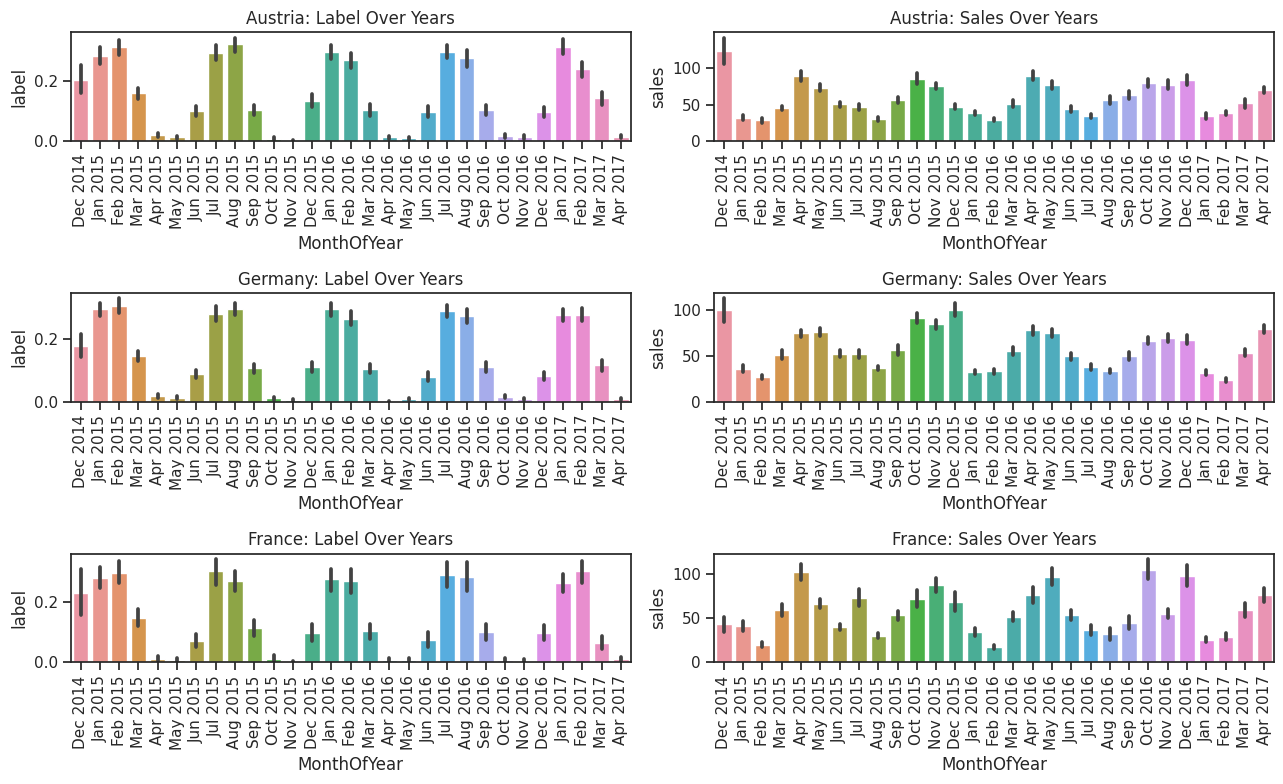

In [52]:
############## plot: Sales vs Labels Per Month ######################

# create a figure with six axes arranged in a 3x2 grid
fig, axes = plt.subplots(3, 2, figsize=(13, 8))

# flatten the axes array for easier indexing
axes = axes.flatten()

# iterate over the countries and plot the bar plots
for i, country in enumerate(countries):
    sns.barplot(data=df[df['country'] == country], x='MonthOfYear', y='label', ax=axes[i*2])
    axes[i*2].set_title(f'{country}: Label Over Years')

    sns.barplot(data=df[df['country'] == country], x='MonthOfYear', y='sales', ax=axes[i*2+1])
    axes[i*2+1].set_title(f'{country}: Sales Over Years')

    # rotate the x-axis labels by 45 degrees
    axes[i*2].tick_params(axis='x', labelrotation=90)
    axes[i*2+1].tick_params(axis='x', labelrotation=90)

# adjust the layout and spacing of the subplots
plt.tight_layout()

# show the plot
plt.show()


# **Feature Engineering** 🔨 🛠️ 🔧

## Creative Features

A new feature `IsPromoMonth` may be added for the sake of enhaning performane,the "IsPromoMonth" determines the potential for a successful commercial campaign in a certain month.
  - If the month is October, November, or December, the value will be set to 3, indicating the highest priority.
  - If the month is April or May, the value will be set to 2, indicating a moderate priority.
  - For all other months, the value will be set to 1, indicating the lowest priority.

## Encoding

In [53]:
encoded_df= df.copy()
encoded_df.head()

,country,article,sales,regular_price,current_price,ratio,retailweek,promo1,promo2,article.1,productgroup,category,cost,style,sizes,gender,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,label,year,month,day,DayOfWeek_No,MonthOfYear
37419,Austria,GZ1752,47,71.0,38.0,0.5,2014-12-28,1,0,AC7347,SHOES,FOOTBALL GENERIC,8.7,regular,"xxs,xs,s,m,l,xl,xxl",men,139,137,137,205,155,155,0,2014,12,28,6,Dec 2014
82146,Germany,PV7587,67,30.9,16.9,0.5,2014-12-28,1,0,PC6383,SHOES,FOOTBALL GENERIC,9.9,wide,"xs,s,m,l,xl",unisex,139,26,26,205,155,155,1,2014,12,28,6,Dec 2014
82145,Germany,PV7587,67,30.9,16.9,0.5,2014-12-28,1,0,TX1463,SWEATSHIRTS,TRAINING,4.2,wide,"xxs,xs,s,m,l,xl,xxl",women,79,148,205,164,211,238,0,2014,12,28,6,Dec 2014
82144,Germany,PV7587,67,30.9,16.9,0.5,2014-12-28,1,0,GG8661,SHOES,RELAX CASUAL,9.6,regular,"xxs,xs,s,m,l,xl,xxl",women,138,43,226,164,211,238,1,2014,12,28,6,Dec 2014
82143,Germany,PV7587,67,30.9,16.9,0.5,2014-12-28,1,0,LI3529,SHOES,RUNNING,9.0,regular,"xxs,xs,s,m,l,xl,xxl",kids,205,140,149,164,211,238,0,2014,12,28,6,Dec 2014


In [54]:
columns_to_encode = ['country','article','article.1', 'productgroup', 'category', 'style', 'sizes', 'gender','MonthOfYear']

print_unique_values(encoded_df, columns_to_encode)

Unique values of 'country': ['Austria' 'Germany' 'France']

Unique values of 'article': ['GZ1752' 'PV7587' 'FF7283' 'FP7124' 'OK8155' 'NY5947' 'CF3238' 'VK5535'
 'OE7548' 'WT9578' 'GC8114' 'QO8312' 'SG5828' 'TL9924' 'QO5375' 'WF4276'
 'CY6963' 'YV2782' 'GA4832' 'IM2273' 'QP2819' 'HZ9888' 'XT5836' 'EF6812'
 'QT2338' 'HN7272' 'BX8284' 'XF4642' 'FE6641' 'DM6477' 'AU7641' 'RF6881'
 'RF2926' 'VY8356' 'GW8244' 'NK4915' 'ML2223' 'AZ5221' 'ZO6398' 'DM6271'
 'BS7795' 'QT7325' 'RT6283' 'KV2454' 'TM4166' 'LU6658' 'XG3252' 'WB3769'
 'HZ4826' 'VF7316' 'FE2938' 'AH6675' 'JB4241' 'QK7994' 'ZK3537' 'VD4566'
 'PC6383' 'SA2925' 'AZ6626' 'VL9749' 'AR1923' 'JY1726' 'WB3723' 'FE6662'
 'BC1489' 'HN6759' 'LH8921' 'SG6172' 'CB4942' 'WK5365' 'QD2412' 'FY5273'
 'PV4787' 'XC9518' 'AP5568' 'UG2991' 'BF7459' 'KT2132' 'WO1329' 'BH9952'
 'WU2517' 'KE3772' 'IQ1913' 'PE2872' 'RH5979' 'AD9697' 'VM7772' 'XU9926'
 'PY1419' 'RE3197' 'WE4646' 'ZZ2466' 'RV9228' 'LI5748' 'FV6234' 'XI5411'
 'YS6935' 'BI5643' 'BX9481' 'HM5731'

Use Frequency Encoding for features encoding

In [55]:
## Implmenting FrequencyEncoder Class
class FrequencyEncoder:
    def fit(self, train_df, column):
        self.train_df = train_df
        self.column = column

    def transform(self, test_df, column):
        frequency_encoded = self.train_df.groupby([self.column]).size()
        col_name = column
        test_df.loc[:,col_name] = test_df[column].apply(lambda x: frequency_encoded[x])
        return test_df



_FrequencyEncoder = FrequencyEncoder()
for column in columns_to_encode:
    _FrequencyEncoder.fit(encoded_df, column=column)
    df_freq_enc = _FrequencyEncoder.transform(encoded_df, column=column)

In [56]:
df_freq_enc.head()

,country,article,sales,regular_price,current_price,ratio,retailweek,promo1,promo2,article.1,productgroup,category,cost,style,sizes,gender,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,label,year,month,day,DayOfWeek_No,MonthOfYear
37419,35140,170,47,71.0,38.0,0.5,2014-12-28,1,0,10000,60000,20000,8.7,50000,90000,10000,139,137,137,205,155,155,0,2014,12,28,6,780
82146,49400,170,67,30.9,16.9,0.5,2014-12-28,1,0,10000,60000,20000,9.9,30000,10000,10000,139,26,26,205,155,155,1,2014,12,28,6,780
82145,49400,170,67,30.9,16.9,0.5,2014-12-28,1,0,10000,10000,30000,4.2,30000,90000,70000,79,148,205,164,211,238,0,2014,12,28,6,780
82144,49400,170,67,30.9,16.9,0.5,2014-12-28,1,0,10000,60000,10000,9.6,50000,90000,70000,138,43,226,164,211,238,1,2014,12,28,6,780
82143,49400,170,67,30.9,16.9,0.5,2014-12-28,1,0,10000,60000,20000,9.0,50000,90000,10000,205,140,149,164,211,238,0,2014,12,28,6,780


In [57]:
print_unique_values(encoded_df, columns_to_encode)


Unique values of 'country': [35140 49400 15460]

Unique values of 'article': [170 330 300 200 220 310 160 250 370 190 130 400 180 120 280 340 420 140
 320 410 110 360 210 460 150 350 290 270 260 510 480 230 430 100 450  90
 550 240 390 380 610  70 540 560 520 490 440  80  60]

Unique values of 'article.1': [10000]

Unique values of 'productgroup': [60000 10000 20000]

Unique values of 'category': [20000 30000 10000]

Unique values of 'style': [50000 30000 20000]

Unique values of 'sizes': [90000 10000]

Unique values of 'gender': [10000 70000]

Unique values of 'MonthOfYear': [ 780 3460 3370 4020 3330 4010 3440 2950 4250 3420 3280 4330 2930 4200
 3170 3300 3130 4530 3020 4060 2830 3180 3820 3220 4070 2870 4220]



## Scaling

# **Split Data** 🎂 ➗ 🍰🍰

Stratified k-fold cross-validation

In [58]:
# Drop the target variable column from the DataFrame
features = encoded_df.drop(['label','retailweek'], axis=1).columns.tolist()
X=encoded_df[features]
y = encoded_df['label']

In [59]:
X.head()

,country,article,sales,regular_price,current_price,ratio,promo1,promo2,article.1,productgroup,category,cost,style,sizes,gender,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,year,month,day,DayOfWeek_No,MonthOfYear
37419,35140,170,47,71.0,38.0,0.5,1,0,10000,60000,20000,8.7,50000,90000,10000,139,137,137,205,155,155,2014,12,28,6,780
82146,49400,170,67,30.9,16.9,0.5,1,0,10000,60000,20000,9.9,30000,10000,10000,139,26,26,205,155,155,2014,12,28,6,780
82145,49400,170,67,30.9,16.9,0.5,1,0,10000,10000,30000,4.2,30000,90000,70000,79,148,205,164,211,238,2014,12,28,6,780
82144,49400,170,67,30.9,16.9,0.5,1,0,10000,60000,10000,9.6,50000,90000,70000,138,43,226,164,211,238,2014,12,28,6,780
82143,49400,170,67,30.9,16.9,0.5,1,0,10000,60000,20000,9.0,50000,90000,10000,205,140,149,164,211,238,2014,12,28,6,780


In [60]:
from sklearn.model_selection import StratifiedKFold

# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []

for train_index, test_index in skf.split(X, y):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [61]:
print(x_train.shape , y_train.shape)
print(x_test.shape , y_test.shape)


(90000, 26) (90000,)
(10000, 26) (10000,)


In [62]:
# check balanced data
y_train.value_counts()

0    77465
1    12535
Name: label, dtype: int64

# **Feature Selection**  🧪 📚

In [63]:
x_train.columns

Index(['country', 'article', 'sales', 'regular_price', 'current_price',
       'ratio', 'promo1', 'promo2', 'article.1', 'productgroup', 'category',
       'cost', 'style', 'sizes', 'gender', 'rgb_r_main_col', 'rgb_g_main_col',
       'rgb_b_main_col', 'rgb_r_sec_col', 'rgb_g_sec_col', 'rgb_b_sec_col',
       'year', 'month', 'day', 'DayOfWeek_No', 'MonthOfYear'],
      dtype='object')

In [64]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# create the classifier with n_estimators = 100
clf = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set
clf.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

 use the feature importance variable to see feature importance scores.

In [65]:
# view the feature scores
feature_scores = pd.Series(clf.feature_importances_, index=x_train.columns).sort_values(ascending=False)
pd.set_option('display.float_format', '{:.4f}'.format)

# Display the feature scores
print(feature_scores)


ratio            0.2454
sales            0.0997
current_price    0.0949
regular_price    0.0864
article          0.0861
day              0.0655
month            0.0511
MonthOfYear      0.0454
country          0.0284
rgb_g_main_col   0.0240
rgb_b_main_col   0.0238
cost             0.0237
year             0.0199
rgb_r_main_col   0.0189
style            0.0137
category         0.0137
productgroup     0.0108
rgb_g_sec_col    0.0103
rgb_r_sec_col    0.0100
rgb_b_sec_col    0.0099
gender           0.0073
promo1           0.0060
sizes            0.0038
promo2           0.0011
article.1        0.0000
DayOfWeek_No     0.0000
dtype: float64


**Visualize feature scores of the features**

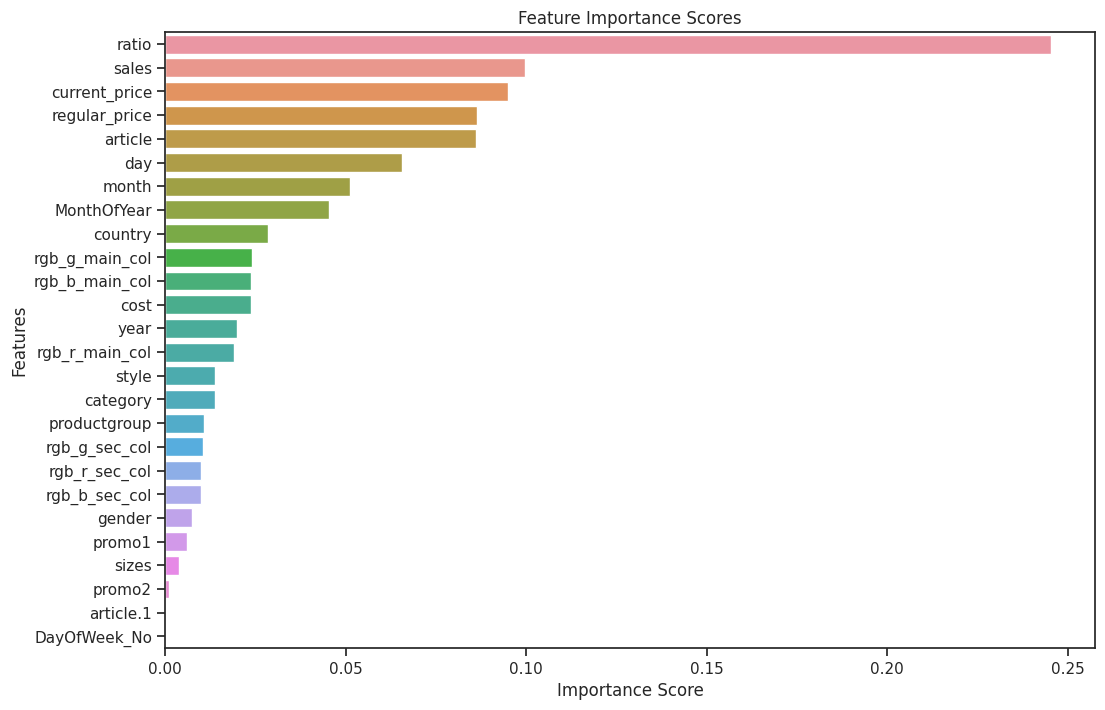

In [66]:

# Sort the feature scores in descending order
feature_scores = feature_scores.sort_values(ascending=False)

# Plot the feature importance scores
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_scores.values, y=feature_scores.index)
plt.title('Feature Importance Scores')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

# **Modeling** 🔥 🌡️

In [67]:
df.columns

Index(['country', 'article', 'sales', 'regular_price', 'current_price',
       'ratio', 'retailweek', 'promo1', 'promo2', 'article.1', 'productgroup',
       'category', 'cost', 'style', 'sizes', 'gender', 'rgb_r_main_col',
       'rgb_g_main_col', 'rgb_b_main_col', 'rgb_r_sec_col', 'rgb_g_sec_col',
       'rgb_b_sec_col', 'label', 'year', 'month', 'day', 'DayOfWeek_No',
       'MonthOfYear'],
      dtype='object')

In [68]:

for train_index, test_index in skf.split(X, y):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

print(x_train.shape)
print(x_test.shape)


(90000, 26)
(10000, 26)


In [69]:
selected_features = ['ratio','sales','current_price','regular_price','article','day','MonthOfYear','country','promo1','promo2']
x_train = x_train.loc[ :,selected_features]
x_test = x_test.loc[ :,selected_features]

In [70]:
print(x_train.shape)
print(x_test.shape)
x_train.head()

(90000, 10)
(10000, 10)


,ratio,sales,current_price,regular_price,article,day,MonthOfYear,country,promo1,promo2
37419,0.5349,47,37.9500,70.9500,170,28,780,35140,1,0
82146,0.5477,67,16.9500,30.9500,170,28,780,49400,1,0
82145,0.5477,67,16.9500,30.9500,170,28,780,49400,1,0
82144,0.5477,67,16.9500,30.9500,170,28,780,49400,1,0
82143,0.5477,67,16.9500,30.9500,170,28,780,49400,1,0


### **Creating a Basline Model**

In [71]:
#import cross validation score
from sklearn.model_selection import cross_val_score

#import Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB

#create classifier object
nb = GaussianNB()

#run cv for NB classifier
from sklearn.metrics import classification_report

nb_accuracy = cross_val_score(nb,x_train,y_train.values.ravel(), cv=3, scoring ='accuracy')
nb_f1 = cross_val_score(nb,x_train,y_train.values.ravel(), cv=3, scoring ='f1')

print('nb_accuracy: ' +str(nb_accuracy))
print('nb F1_Macro Score: '+str(nb_f1))
print('nb_accuracy_avg: ' + str(nb_accuracy.mean()) +'  |  lr_f1_avg: '+str(nb_f1.mean()))


nb_accuracy: [0.83093333 0.85083333 0.84376667]
nb F1_Macro Score: [0.22446483 0.16495615 0.20166922]
nb_accuracy_avg: 0.8418444444444444  |  lr_f1_avg: 0.1970300673123798


### **Model Comparison & Selection**

Three Models to try:

- Logistic regression
- Decision Tree
- K Nearest Neighbors (KNN)
- Random Forest
- Voting Classifier


In [72]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=32, max_iter = 2000, class_weight = 'balanced')

lr_accuracy = cross_val_score(lr,x_train,y_train.values.ravel(), cv=3, scoring ='accuracy')
lr_f1 = cross_val_score(lr,x_train,y_train.values.ravel(), cv=3, scoring ='f1')

print('lr_accuracy: ' +str(lr_accuracy))
print('lr F1_Macro Score: '+str(lr_f1))
print('lr_accuracy_avg: ' + str(lr_accuracy.mean()) +'  |  lr_f1_avg: '+str(lr_f1.mean())+'\n')




lr_accuracy: [0.68756667 0.8023     0.74163333]
lr F1_Macro Score: [0.44098527 0.52142338 0.46950927]
lr_accuracy_avg: 0.7438333333333333  |  lr_f1_avg: 0.47730597556193183



In [73]:
## Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state =32)

dt_accuracy = cross_val_score(dt,x_train,y_train.values.ravel(), cv=3, scoring ='accuracy')
dt_f1 = cross_val_score(dt,x_train,y_train.values.ravel(), cv=3, scoring ='f1')

print('dt_accuracy: ' +str(dt_accuracy))
print('dt F1_Macro Score: '+str(dt_f1))
print('dt_accuracy_avg: ' + str(dt_accuracy.mean()) +'  |  dt_f1_avg: '+str(dt_f1.mean())+'\n')



dt_accuracy: [0.7425     0.85213333 0.8397    ]
dt F1_Macro Score: [0.24626793 0.16175359 0.23606037]
dt_accuracy_avg: 0.8114444444444445  |  dt_f1_avg: 0.21469396142425254



In [74]:
## KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline

knn = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=3))
knn_accuracy = cross_val_score(knn,x_train,y_train.values.ravel(), cv=3, scoring ='accuracy')
knn_f1 = cross_val_score(knn,x_train,y_train.values.ravel(), cv=3, scoring ='f1')

print('knn_accuracy: ' +str(knn_accuracy))
print('knn F1_Macro Score: '+str(knn_f1))
print('knn_accuracy_avg: ' + str(knn_accuracy.mean()) +'  |  knn_f1_avg: '+str(knn_f1.mean()))


knn_accuracy: [0.7601     0.83963333 0.8189    ]
knn F1_Macro Score: [0.24106295 0.19454211 0.28390668]
knn_accuracy_avg: 0.8062111111111111  |  knn_f1_avg: 0.23983724779622084


In [75]:
##RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

#first let's try a non-tuned implementation
rf = RandomForestClassifier(random_state=42)

rf_accuracy = cross_val_score(rf,x_train,y_train.values.ravel(), cv=3, scoring ='accuracy')
rf_f1 = cross_val_score(rf,x_train,y_train.values.ravel(), cv=3, scoring ='f1')

print('rf_accuracy: ' +str(rf_accuracy))
print('rf F1_Macro Score: '+str(rf_f1))
print('rf_accuracy_avg: ' + str(rf_accuracy.mean()) +'  |  rf_f1_avg: '+str(rf_f1.mean()))

rf_accuracy: [0.76166667 0.86046667 0.8532    ]
rf F1_Macro Score: [0.18378995 0.02560521 0.16273764]
rf_accuracy_avg: 0.8251111111111111  |  rf_f1_avg: 0.12404427035871701


**Randome Forest - Tunning Paramters**

In [76]:
# from sklearn.model_selection import GridSearchCV


# features_rf = {'n_estimators': [50,100,200],
#                'criterion': ['entropy'],
#                'max_depth': np.arange(30,50,1),
#                'min_samples_split': [2,3,4]}

# gs_rf = GridSearchCV(estimator = rf, param_grid =features_rf, cv = 3, scoring ='f1')

# gs_rf.fit(x_train,y_train)

In [77]:
# print('best stcore = ' + str(gs_rf.best_score_))
# print('best params = ' + str(gs_rf.best_params_))


In [78]:
## Voting Classifier

from sklearn.ensemble import VotingClassifier

lr_voting = LogisticRegression(random_state=32)
dt_voting = DecisionTreeClassifier(**{'criterion': 'entropy', 'max_depth': 34, 'min_samples_split': 2})
knn_voting = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=1))
rf_voting = RandomForestClassifier(random_state=42, **{'n_estimators':100,'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2})

ens = VotingClassifier(estimators = [('dt', dt_voting), ('knn', knn_voting), ('lr',lr_voting) , ('rf', rf_voting)], voting = 'hard')

voting_accuracy = cross_val_score(ens,x_train,y_train.values.ravel(), cv=3, scoring ='accuracy')
voting_f1 = cross_val_score(ens,x_train,y_train.values.ravel(), cv=3, scoring ='f1')

print('voting_accuracy: ' +str(voting_accuracy))
print('voting F1_Macro Score: '+str(voting_f1))
print('voting_accuracy_avg: ' + str(voting_accuracy.mean()) +'  |  voting_f1_avg: '+str(voting_f1.mean()))


voting_accuracy: [0.79453333 0.8607     0.85893333]
voting F1_Macro Score: [0.10552254 0.01785295 0.0510524 ]
voting_accuracy_avg: 0.8380555555555556  |  voting_f1_avg: 0.05814262782132212


#### **Models Comparison**

In [79]:
# Set the float format
pd.options.display.float_format = '{:.3f}'.format

In [80]:

# Define the data for the models
model_names = ['GaussianNB','Logistic Regression', 'Decision Tree',  'KNN' ,'Random Forest' ,'VotingClassifier']
accuracies = [nb_accuracy.mean(), lr_accuracy.mean(), dt_accuracy.mean(), knn_accuracy.mean(),rf_accuracy.mean(),voting_accuracy.mean()]
f1_scores  = [nb_f1.mean(), lr_f1.mean(), dt_f1.mean(), knn_f1.mean(),rf_f1.mean() ,voting_f1.mean()]

# Create a dataframe
data = {'Model': model_names, 'Accuracy': accuracies , 'F1 Score': f1_scores}
df_models = pd.DataFrame(data)

df_models.head(10)

,Model,Accuracy,F1 Score
0,GaussianNB,0.842,0.197
1,Logistic Regression,0.744,0.477
2,Decision Tree,0.811,0.215
3,KNN,0.806,0.240
4,Random Forest,0.825,0.124
5,VotingClassifier,0.838,0.058


 `Logistic Regression` may be an appropriate choice, as:
 - It has the highest F1 score(peering in mind that data is imbalanced), and
 - With accepted accuracy compring to other models.

**Model Evaluation**

In [81]:

from sklearn.model_selection import cross_val_predict
y_train_predicted= cross_val_predict(lr, x_train,y_train , cv = 3 )

In [82]:
from sklearn.metrics import confusion_matrix
conf_mx = confusion_matrix(y_train , y_train_predicted)
conf_mx

array([[56587, 20878],
       [ 2177, 10358]])

**Confusion Matrix Representation**

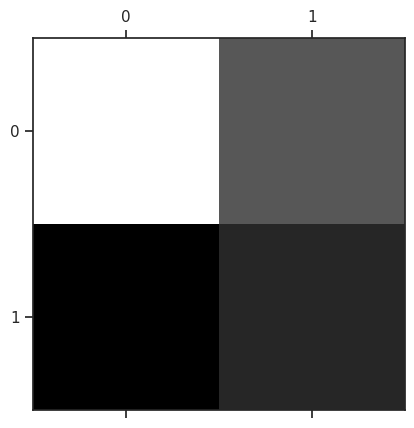

In [83]:
import matplotlib as mlp
import matplotlib.pyplot as plt

plt.matshow(conf_mx , cmap = plt.cm.gray)
plt.show()

#### **Model Prediction**

In [84]:
lr.fit(x_train, y_train)
X_tets_pred = lr.predict(x_test)


In [85]:
X_tets_pred[10:]

array([1, 1, 0, ..., 0, 0, 0])

# **Other Thoughts..** 👩🏻‍💻

There are several additional approaches that can be applied to this dataset:

1. **Handling Imbalanced Data**: Addressing the issue of imbalanced data can be achieved through techniques such as resampling methods and SMOTE (Synthetic Minority Over-sampling Technique) to balance the representation of different classes within the dataset.

2. **Feature Engineering**: Introducing new features, such as `'IspromotingMonth'`, can provide valuable insights. This feature could indicate whether a particular month exhibits a higher potential for promotional activities or not.

3. **Enhanced Visualization**: Utilizing advanced visualization techniques can yield further insights from the data, particularly by exploring additional aspects such as 'productgroup', 'category', 'cost', 'style', 'sizes', and 'gender'. Analyzing these specifications can help identify preferred articles that were significantly sold in each country, shedding light on each country's preferences.

4. **Clustering Techniques**: Employing clustering techniques for both articles and customers can be beneficial. By applying clustering algorithms, patterns and groups within the dataset can be identified, enabling a deeper understanding of the relationships between different articles or customer segments.


5. **Time Series Analysis**: Performing time series analysis with decomposition into four components can provide valuable insights. By decomposing a time series into its original, trend, seasonality, and residual components, which may help to understanding overall patterns and detecting seasonal pattern.

These approaches offer potential avenues for extracting more value and knowledge from the dataset, contributing to a comprehensive analysis and decision-making process.

# **Thanks🌻**